In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
df = pd.read_parquet("../data/outputs/plots/plot_metrics.parquet")
df

,max,min,range,mean,median,sd,var,cv,crr,skew,...,norm_fhd,cv_inside,cv_inside_p,cv_ppi,cv_vad,site,site_type,variant,grid_agg,grid_size
plot,,,,,,,,,,,,,,,,,,,,,
AGG_O_01_P1,16.275999,0.000000,16.275999,4.428016,4.555000,4.093416,16.756056,0.924436,0.272058,0.245465,...,0.824705,1.051162,1.051162,0.111321,1.511392,AGG_O_01,AGG,default,none,0
AGG_O_01_P1,16.275999,0.000000,16.275999,6.716327,7.568000,3.647536,13.304515,0.543085,0.412652,-0.601755,...,0.860111,0.848656,0.848656,0.129149,0.997475,AGG_O_01,AGG,rnw,none,0
AGG_O_01_P1,16.275999,0.000000,16.275999,4.428016,4.555000,4.093416,16.756056,0.924436,0.272058,0.245465,...,0.821678,1.066437,1.066437,0.110900,1.522600,AGG_O_01,AGG,iw,none,0
AGG_O_01_P1,16.275999,0.000000,16.275999,4.428016,4.555000,4.093416,16.756056,0.924436,0.272058,0.245465,...,0.811571,1.125259,1.125259,0.109713,1.573446,AGG_O_01,AGG,fr,none,0
AGG_O_01_P1,16.275999,0.001000,16.275000,5.646877,6.400000,3.805994,14.485587,0.674000,0.346905,-0.170667,...,0.838153,0.972110,0.972110,0.070207,0.761257,AGG_O_01,AGG,v0,none,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ULY_Y_96_P5,1.277456,6.454628,1.294826,1.519432,2.150591,1.458456,3.106510,0.608595,0.484396,1.262774,...,0.240840,0.448943,0.448943,0.698109,0.622618,ULY_Y_96,ULY,rnw,cv,1
ULY_Y_96_P5,1.273690,8.157261,1.284342,1.545650,2.531208,1.467207,3.153993,0.567536,0.486007,1.016162,...,0.247022,0.454578,0.454578,0.714566,0.606891,ULY_Y_96,ULY,iw,cv,1
ULY_Y_96_P5,1.273690,8.157261,1.284342,1.545650,2.531208,1.467207,3.153993,0.567536,0.486007,1.016162,...,0.276168,0.468649,0.468649,0.728377,0.601008,ULY_Y_96,ULY,fr,cv,1


In [72]:
def starts_with(prefixes):
    def checker(s: str) -> bool:
        return s.startswith(prefixes)
    return checker

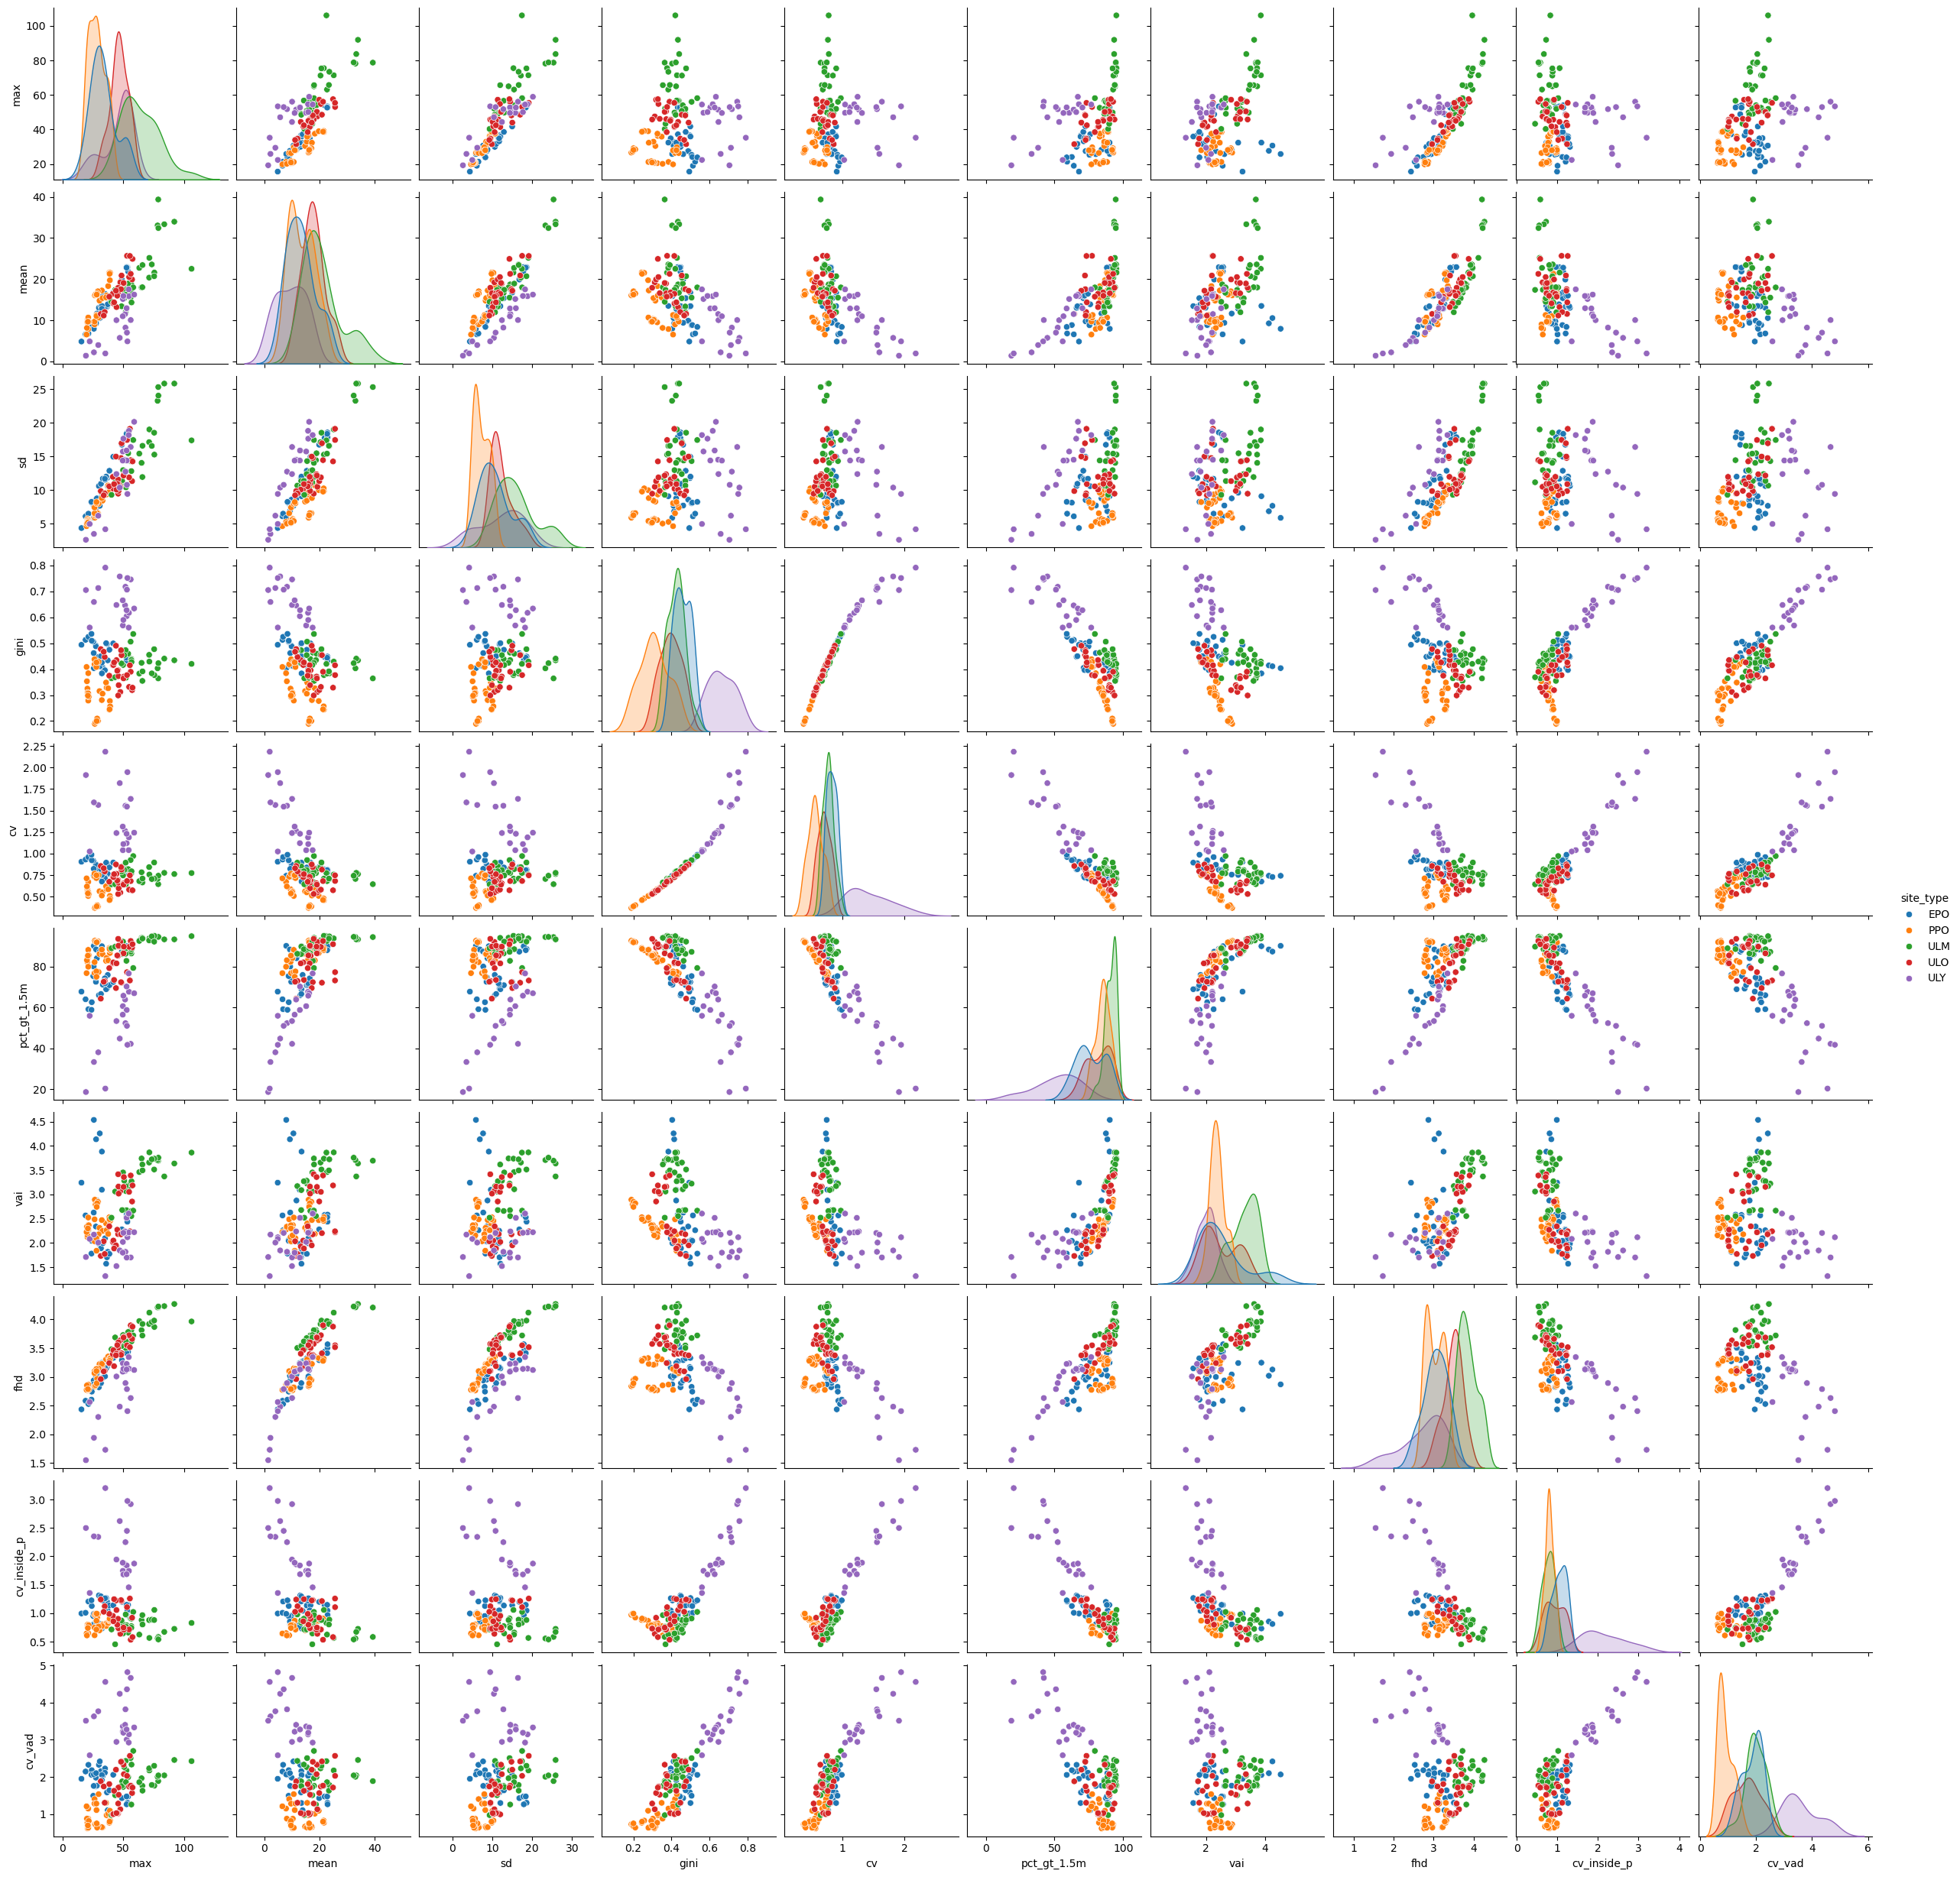

In [73]:
default_metrics = df[(df['variant'] == 'default') & (df['grid_size'] == 0) & (df['grid_agg'] == 'none')]
default_metrics
sub_df = default_metrics[['max', 'mean', 'sd', 'gini', 'cv', 'pct_gt_1.5m', 'vai', 'fhd',  'cv_inside_p', 'cv_vad', 'site_type']]
sub_df = sub_df[sub_df['site_type'].apply(starts_with(('EPO', 'PPO', 'UL')))]

sns.pairplot(sub_df, hue='site_type')

<Axes: >

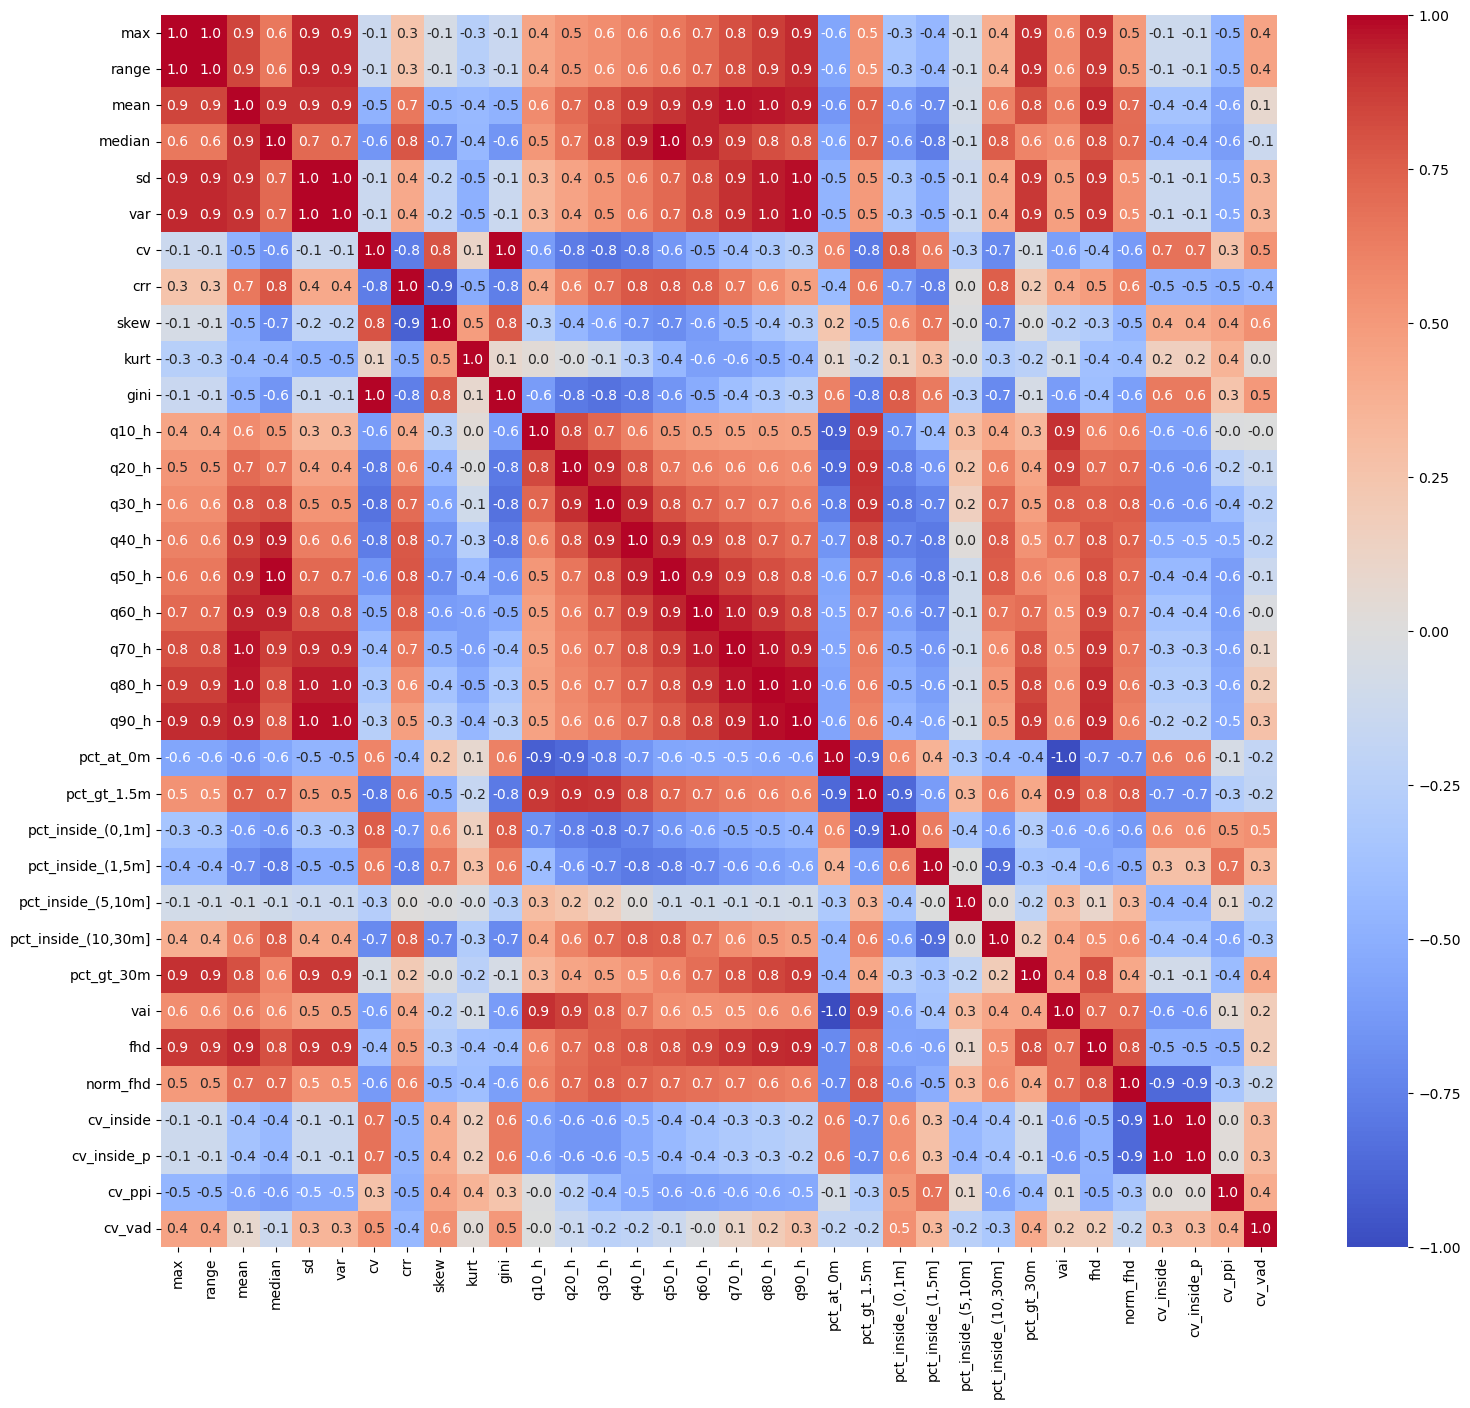

In [85]:
plt.figure(figsize=(18, 16))
df = default_metrics
sub_corr_df = df.drop(columns=['min', 'grid_size']).corr(method='spearman', numeric_only=True)
sns.heatmap(sub_corr_df, cmap='coolwarm', annot=True, fmt='.1f')
